In [ ]:
import requests
import pandas as pd
import json
from pandas.io.json import json_normalize 

In [ ]:
r = requests.get("https://data.cityofchicago.org/resource/3i3m-jwuy.json", headers={"X-App-Token": "JC6TefVpi0uqK3mS0rolqVQVw"})  
data = r.json()
df = pd.DataFrame.from_dict(json_normalize(data), orient='columns')

In [ ]:
df['primary_type'].value_counts()

In [ ]:
df = pd.read_csv('ps1/data/Crimes_-_2018.csv')

In [ ]:
df['Date'].dtype

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df['Date'].dtype

In [ ]:
df['Date'] = df['Date'].dt.date

In [ ]:
import seaborn as sns
sns.set(style="darkgrid")
sns.lineplot(hue='Primary Type', data=data)

In [ ]:
data = df.groupby(['Date', 'Primary Type']).size().unstack().fillna(0)
df.groupby(['Date', 'Primary Type']).size().unstack()


In [ ]:
test = data.iloc[:,0:6]
test.index = pd.to_datetime(test.index)

In [105]:
month_test = test.groupby([(test.index.year),(test.index.month)]).sum()

In [ ]:
data.index = pd.to_datetime(data.index)
data.index

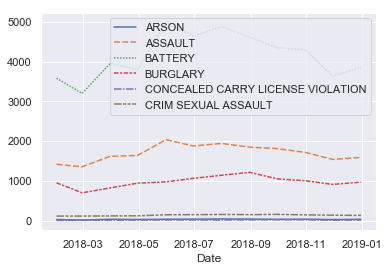

In [125]:
data = data.groupby(pd.Grouper(freq="M")).sum()
sns.lineplot(hue="Primary Type", data=data.iloc[:,0:6])

In [131]:
df['Location'].isna().sum()

2715

In [ ]:
df

In [137]:
from uszipcode import SearchEngine
search = SearchEngine(simple_zipcode=True)

Start downloading data for simple zipcode database, total size 9MB ...
  1 MB finished ...
  2 MB finished ...
  3 MB finished ...
  4 MB finished ...
  5 MB finished ...
  6 MB finished ...
  7 MB finished ...
  8 MB finished ...
  9 MB finished ...
  10 MB finished ...
  Complete!


In [140]:
search.by_coordinates(39.122229, -77.133578)[0].zipcode

'20855'

In [141]:
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')